In [7]:
import numpy as np

from typing import TypeVar
from dataclasses import dataclass
from matplotlib import pyplot as plt
from typing import Any

In [8]:
TVertex = TypeVar('TVertex', bound='Vertex')


@dataclass
class Vertex:
    x: float
    y: float

    def distance(self, to: TVertex):
        return np.sqrt(np.power(self.x - to.x, 2) + np.power(self.y - to.y, 2))

    def __repr__(self) -> str:
        return f'V[{self.x}, {self.y}]'

    def __eq__(self, other: TVertex):
        assert isinstance(other, self.__class__)
        return self.x == other.x and self.y == other.y


class Descriptor:
    """ Hold info about scene """

    scene: list[Vertex]

    def __init__(self):
        self.scene = []

    def insert(self, vertex: Vertex):
        for v in self.scene:
            if v == vertex:
                raise RuntimeError(f'Duplicate found for: {vertex}')
        self.scene.append(vertex)


**Solver**

In [9]:
def sails_man_nn(start: Vertex, desc: Descriptor, visualization=False, verbose=False) -> list[Vertex]:
    path: list[Vertex] = [start]
    cost: list[float] = [0]

    def _find_nn(origin: Vertex) -> Vertex:
        neighbors = []
        for v in desc.scene:
            if v not in path:
                neighbors.append((v, origin.distance(v)))

        neighbors_str = ", ".join(
            [f"-> {v} ({c:.2f})" for v, c in neighbors] or '-'
        )

        if verbose:
            print(f'Neighbors: {neighbors_str}')

        try:
            return min(neighbors, key=lambda x: x[1])
        except ValueError:
            raise RuntimeError('No alailable vertexes')

    def _solver(origin: Vertex) -> Vertex:
        if verbose:
            print(f' - Solving: {origin}')

        try:
            nn, c = _find_nn(origin)
        except RuntimeError:
            print('End reached.')
            return

        if verbose:
            print(f'Solution: {nn} ({c})')

        path.append(nn)
        cost.append(c)

        _solver(nn)

    _solver(start)

    print('Path: ',
          ' -> '.join([str(v) for v in path]),
          f'Total cost: {sum(cost):.2f}')

    if visualization:
        assert hasattr(desc.scene[0], 'x')
        assert hasattr(desc.scene[0], 'y')

        fig, ax = plt.subplots()

        _prev: Vertex = None
        for v, c in zip(path, cost):
            ax.scatter(v.x, v.y, label=str(v))

            if _prev is not None:
                ax.plot([_prev.x, v.x], [_prev.y, v.y])

            _prev = v
        ax.legend()


**Simple graph implementation**

End reached.
Path:  V[0, 3] -> V[1, 1] -> V[2, 2] -> V[4, 3] -> V[3, 5] -> V[2, 5] -> V[1, 6] -> V[3, 7] -> V[6, 7] Total cost: 15.77


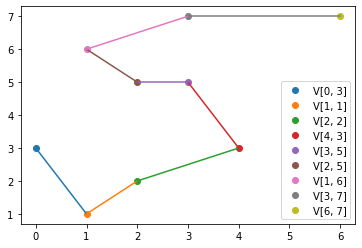

In [10]:
sim_desc = Descriptor()

sim_desc.insert(Vertex(0, 3))
sim_desc.insert(Vertex(1, 1))
sim_desc.insert(Vertex(2, 2))
sim_desc.insert(Vertex(4, 3))
sim_desc.insert(Vertex(3, 5))
sim_desc.insert(Vertex(1, 6))
sim_desc.insert(Vertex(6, 7))
sim_desc.insert(Vertex(3, 7))
sim_desc.insert(Vertex(2, 5))

sails_man_nn(sim_desc.scene[0], sim_desc, True, False)